In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
    

In [2]:
df = pd.read_csv("/Users/alessandromorosini/Desktop/Optimization/Project/final/data/nutrients.csv").iloc[:, 1:]
df.head()

,Food Name,Description,Group,Edible proportion,Water (g),Total nitrogen (g),Protein (g),Fat (g),Carbohydrate (g),Energy (kcal) (kcal),...,Niacin equivalent (mg),Vitamin B6 (mg),Vitamin B12 (µg),Folate (µg),Pantothenate (mg),Biotin (µg),Vitamin C (mg),category,subcategory,Cluster
0,"Almonds, toasted",Literature sources,GA,1.00,2.4,4.05,21.0,52.5,5.9,579.0,...,7.1,0.140,0.0,55.0,0.32,49.0,0.0,Nuts and seeds,"Nuts and seeds, general",Proteins
1,"Almonds, weighed with shells",Calculated from 14-896,GA,0.37,1.6,1.51,7.8,18.5,1.9,205.0,...,2.6,0.050,0.0,16.0,0.17,23.7,0.0,Nuts and seeds,"Nuts and seeds, general",Vegetable
2,"Almonds, whole kernels","Literature sources, Prunus dulcis",GA,1.00,4.4,4.09,21.2,49.9,5.3,554.0,...,7.0,0.140,0.0,44.0,0.47,64.0,0.0,Nuts and seeds,"Nuts and seeds, general",Proteins
3,"Anchovies, canned in oil, drained","10 samples, 4 brands",JC,0.74,46.4,4.03,25.2,10.0,0.0,191.0,...,8.5,0.275,11.0,18.0,0.89,3.4,0.0,Fish and fish products,Fatty fish,Proteins
4,"Apple sauce, homemade",Recipe,WC,1.00,77.5,0.04,0.3,0.2,20.2,79.0,...,0.2,0.040,0.0,1.0,0.41,0.7,9.0,"Soups, sauces and miscellaneous foods",Sauces,Carbs


In [94]:
# Define the requirements dictionary in Python
requirements_dict = {
    "Protein (g)":       {"R": 50,   "U": 180},
    "Fat (g)":           {"R": 20,   "U": 100},
    "Carbohydrate (g)":  {"R": 130,  "U": 350},
    "Total sugars (g)":  {"R": 0,    "U": 50},
    "AOAC fibre (g)":    {"R": 25,   "U": 70},
    "Vitamin E (mg)":    {"R": 15,   "U": 50},
    "Vitamin C (mg)":    {"R": 75,   "U": 200},
    "Cholesterol (mg)":  {"R": 0,    "U": 300},
    "Sodium (mg)":       {"R": 500,  "U": 1800}
}

# Extract keys and values
nutrients = list(requirements_dict.keys())
R_values = [requirements_dict[n]["R"] for n in nutrients]
U_values = [requirements_dict[n]["U"] for n in nutrients]

# Create the DataFrame
df_requirements = pd.DataFrame({
    "Nutrient": nutrients,
    "R": R_values,
    "U": U_values
})

df_requirements = df_requirements.set_index("Nutrient")
df_requirements.R = df_requirements.R / 2
df_requirements.U = df_requirements.U / 2
df_requirements

,R,U
Nutrient,,
Protein (g),25.0,90.0
Fat (g),10.0,50.0
Carbohydrate (g),65.0,175.0
Total sugars (g),0.0,25.0
AOAC fibre (g),12.5,35.0
Vitamin E (mg),7.5,25.0
Vitamin C (mg),37.5,100.0
Cholesterol (mg),0.0,150.0
Sodium (mg),250.0,900.0


In [95]:
cols = [
    "Food Name", 
    "Energy (kcal) (kcal)",
    "Cluster"] + [
        "Protein (g)"      ,
        "Fat (g)",           
        "Carbohydrate (g)"  ,
        "Total sugars (g)" ,
        "AOAC fibre (g)"    ,
        "Vitamin E (mg)"    ,
        "Vitamin C (mg)"     ,
        "Cholesterol (mg)" ,
        "Sodium (mg)"      ,
    ]  

df = df[cols]

In [96]:
df

,Food Name,Energy (kcal) (kcal),Cluster,Protein (g),Fat (g),Carbohydrate (g),Total sugars (g),AOAC fibre (g),Vitamin E (mg),Vitamin C (mg),Cholesterol (mg),Sodium (mg)
0,"Almonds, toasted",579.0,Proteins,21.0,52.5,5.9,5.1,10.9,23.900,0.0,0.0,3.0
1,"Almonds, weighed with shells",205.0,Vegetable,7.8,18.5,1.9,1.6,4.6,9.480,0.0,0.0,65.0
2,"Almonds, whole kernels",554.0,Proteins,21.2,49.9,5.3,4.5,12.5,25.630,0.0,0.0,1.0
3,"Anchovies, canned in oil, drained",191.0,Proteins,25.2,10.0,0.0,0.0,0.0,0.455,0.0,63.0,5870.0
4,"Apple sauce, homemade",79.0,Carbs,0.3,0.2,20.2,20.2,1.4,0.100,9.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1078,"Yogurt, whole milk, twin pot, not fruit",148.0,Carbs,4.2,5.6,21.5,18.2,0.3,0.870,2.0,11.6,100.0
1079,"Yogurt, whole milk, twin pot, thick and creamy...",106.0,Carbs,4.1,3.2,16.2,15.6,1.0,0.120,2.0,11.6,53.0
1080,"Yorkshire pudding, made with semi-skimmed milk...",197.0,Carbs,6.7,8.3,25.6,3.5,1.1,3.070,2.0,52.3,52.0
1081,"Yorkshire pudding, made with skimmed milk, hom...",190.0,Carbs,6.8,7.4,25.9,3.6,1.1,3.070,1.0,51.2,54.0


In [97]:
def compute_meal_nutrients(meal_df):
    
    nutrient_cols = [col for col in df.columns if (col != 'Food Name') and (col != "Cluster") and (col != "Energy (kcal) (kcal)")]

    subset_df = meal_df[["Food Name", "Quantity"]]
    food_items = dict(zip(meal_df["Food Name"], meal_df["Quantity"]))
    
    meal_df = df[df["Food Name"].isin(food_items.keys())]
    meal_df = meal_df[["Food Name"] + nutrient_cols]
    meal_df["Quantity"] = meal_df["Food Name"].apply(lambda x: food_items[x])

    for col in nutrient_cols:
        meal_df[col] = meal_df[col] * meal_df["Quantity"] / 100
        
    meal_nutrients = meal_df[nutrient_cols]
    res = pd.DataFrame(meal_nutrients.sum())
    res.columns = ["Values"]
    return res

In [98]:
def check_validity(meal_nutrients_df, df_requirements):
    total_df = meal_nutrients_df.merge(df_requirements, left_index=True, right_index=True)
    
    total_df["R_holds"] = total_df.R <= total_df.Values
    total_df["U_holds"] = total_df.U >= total_df.Values
    
    return total_df

In [99]:
def check_calories(meal_df):
    total_calories = meal_df.Calories.sum()
    calories_density = total_calories / meal_df.Quantity.sum()
    return total_calories, calories_density

In [100]:
def check_meal(meal_df):
    meal_nutrients = compute_meal_nutrients(meal_df)
    validity = check_validity(meal_nutrients, df_requirements)
    total_calories, calories_density = check_calories(meal_df)
    
    return validity, total_calories, calories_density

In [101]:
def plot_nutrient_levels(res):
    import matplotlib.pyplot as plt
    import numpy as np

    # Sort the nutrients alphabetically
    nutrients = sorted(res.index)
    y_pos = np.arange(len(nutrients))

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, nutrient in enumerate(nutrients):
        r_val = res.loc[nutrient, 'R']
        u_val = res.loc[nutrient, 'U']
        val = res.loc[nutrient, 'Values']

        # Choose color based on whether val is within [r_val, u_val]
        point_color = 'red' if val < r_val or val > u_val else 'blue'

        ax.hlines(y=y_pos[i], xmin=r_val, xmax=u_val, color='gray', lw=4, zorder=1)
        ax.plot(val, y_pos[i], 'o', color=point_color, markersize=10, zorder=2)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(nutrients, fontsize=12)
    ax.set_xlabel('Nutrient Value', fontsize=14)
    ax.set_title('Nutrient Levels vs. Requirements', fontsize=16)
    ax.invert_yaxis()
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)

    # Update the legend to reflect both possible point colors
    ax.plot([], [], color='gray', lw=4, label='Requirement Range')
    ax.plot([], [], 'o', color='blue', label='Within Range')
    ax.plot([], [], 'o', color='red', label='Outside Range')
    leg = ax.legend(fontsize=12)
    leg.get_frame().set_edgecolor('black')

    plt.tight_layout()
    return fig, ax


# Optimized

In [102]:
result_df = pd.read_csv("/Users/alessandromorosini/Desktop/Optimization/Project/final/data/single_time_results.csv")
result_df

,Food Name,Cluster,Quantity,Calories
0,"Breakfast cereal, puffed wheat, unfortified",Sweet,166.995508,569.454682
1,"Pork chops in mustard and cream, homemade",Proteins,188.160144,494.861179
2,"Sandwich, white bread, chicken salad",Carbs,128.196338,220.497702
3,Tomato puree,Vegetable,85.848789,57.518689


In [103]:
res, calories, density = check_meal(result_df)
res

,Values,R,U,R_holds,U_holds
Protein (g),68.702584,25.0,90.0,True,True
Fat (g),46.296296,10.0,50.0,True,True
Carbohydrate (g),162.037037,65.0,175.0,True,True
Total sugars (g),15.982209,0.0,25.0,True,True
AOAC fibre (g),19.231612,12.5,35.0,True,True
Vitamin E (mg),8.681333,7.5,25.0,True,True
Vitamin C (mg),40.760870,37.5,100.0,True,True
Cholesterol (mg),138.888889,0.0,150.0,True,True
Sodium (mg),722.987501,250.0,900.0,True,True


In [104]:
calories, density

(np.float64(1342.332251877636), np.float64(2.358275497158539))

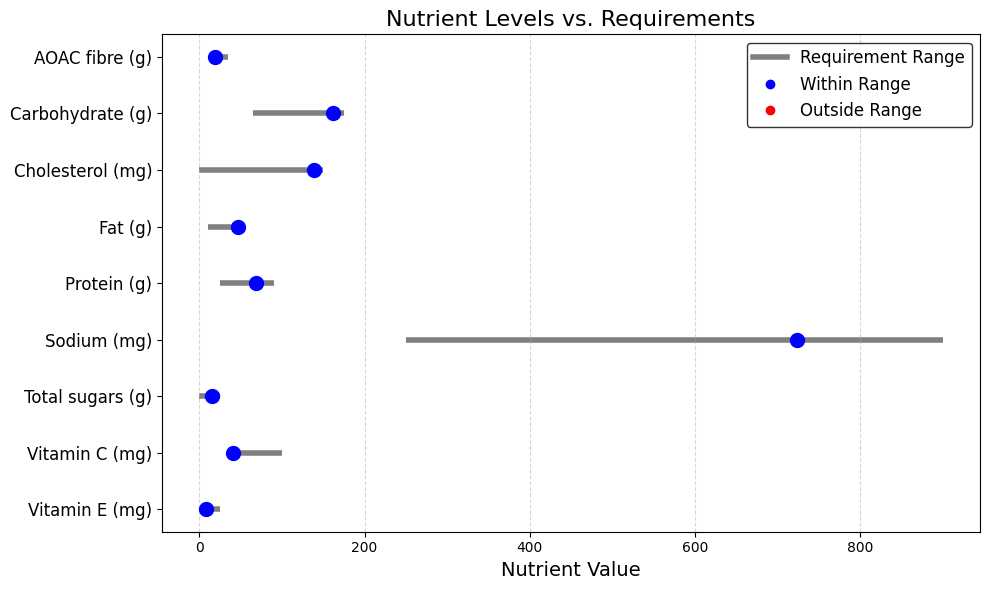

In [105]:
fig_opt, ax_opt = plot_nutrient_levels(res)

# Random

In [106]:
def create_random_meal(seed=None):
    if not seed:
        seed = random.seed()
    random_meal = df.sample(n=4, random_state=seed).copy()
    random_meal = random_meal[["Food Name", "Cluster", "Energy (kcal) (kcal)"]] # , "Quantity"]]
    random_meal

    random.seed(seed)
    random_meal["Quantity"] = [random.uniform(0, 300) for _ in range(4)]
    random_meal["Calories"] = random_meal["Quantity"] * random_meal["Energy (kcal) (kcal)"] / 100
    random_meal.drop(columns=["Energy (kcal) (kcal)"], inplace=True)

    return random_meal

In [107]:
create_random_meal()

,Food Name,Cluster,Quantity,Calories
407,"Curry, green bean, masala, homemade",Vegetable,167.743093,218.066020
1004,Taramasalata,Vegetable,145.404276,751.740105
540,"Lamb, loin chops, roasted, lean and fat",Proteins,68.871936,247.250250
829,"Potatoes, new, frozen, `roast' in corn oil",Carbs,21.983768,34.514516


Avg Calories: 1260.8095866456497
Avg Calories/Weight: 2.119059265354518
Most often broken constraints: Counter({'Vitamin C (mg)': 83, 'AOAC fibre (g)': 73, 'Vitamin E (mg)': 69, 'Sodium (mg)': 62, 'Cholesterol (mg)': 57, 'Fat (g)': 54, 'Total sugars (g)': 54, 'Carbohydrate (g)': 52, 'Protein (g)': 38})


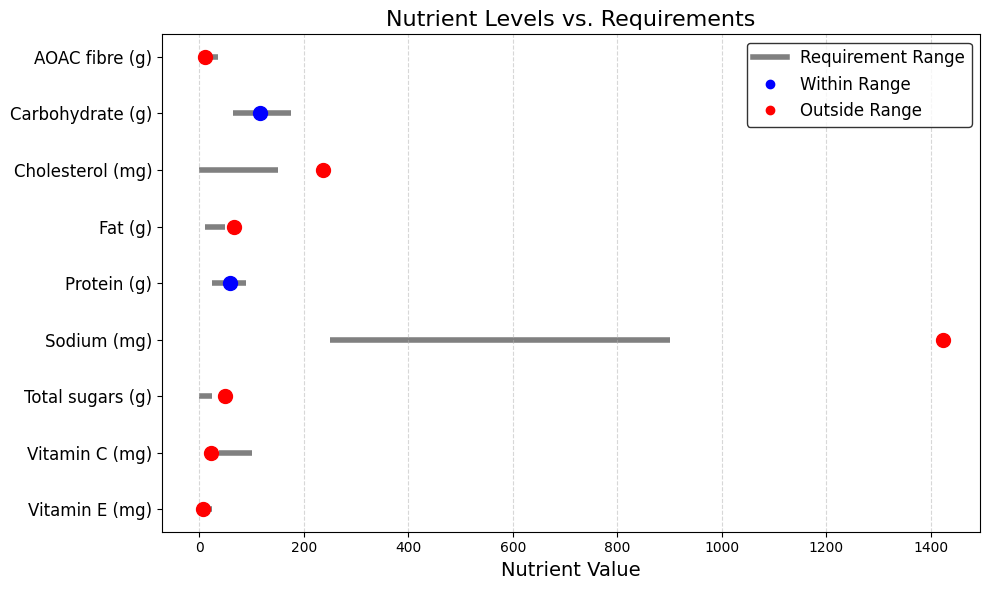

In [108]:
import numpy as np
import pandas as pd
from collections import Counter

num_runs = 100
calories_list = []
cal_per_weight_list = []
constraint_counter = Counter()
res_list = []

for run in range(num_runs):
    meal = create_random_meal(run)  
    res_df, calories, calories_density = check_meal(meal) 

    # Append results for later averaging
    res_list.append(res_df)

    # Track calories
    calories_list.append(calories)
    cal_per_weight_list.append(calories_density)

    # Count constraints violations
    for i, row in res_df.iterrows():
        if not row["R_holds"]:
            constraint_counter[i] += 1
        if not row["U_holds"]:
            constraint_counter[i] += 1

print("Avg Calories:", np.mean(calories_list))
print("Avg Calories/Weight:", np.nanmean(cal_per_weight_list))
print("Most often broken constraints:", constraint_counter)

# Combine all results and compute averages
combined_res = pd.concat(res_list)
avg_res = combined_res.groupby(level=0).mean()

# avg_res now contains the average Values, R, U, and the fraction of runs where R_holds/U_holds = True
# For example, an R_holds average of 0.9 means that in 90% of runs the requirement was held.

# Display the averaged results
fig_rand, ax_rand = plot_nutrient_levels(avg_res)

## Random per Cluster

In [109]:
def create_random_meal_per_cluster(seed=None):
    if seed is not None:
        random.seed(seed)
    
    clusters = df["Cluster"].unique()
    chosen_clusters = random.sample(list(clusters), 4)

    selected_rows = []
    for c in chosen_clusters:
        cluster_data = df[df["Cluster"] == c]
        selected_rows.append(cluster_data.sample(n=1, random_state=seed))

    random_meal = pd.concat(selected_rows).copy()
    random_meal = random_meal[["Food Name", "Cluster", "Energy (kcal) (kcal)"]]
    random_meal["Quantity"] = [random.uniform(100, 200) for _ in range(len(random_meal))]
    
    random_meal["Calories"] = random_meal["Quantity"] * random_meal["Energy (kcal) (kcal)"] / 100
    random_meal.drop(columns=["Energy (kcal) (kcal)"], inplace=True)

    return random_meal

In [110]:
create_random_meal_per_cluster()

,Food Name,Cluster,Quantity,Calories
1042,"Turkey, strips, stir-fried in corn oil",Proteins,193.837686,317.893804
427,"Dips, sour-cream based, reduced fat",Vegetable,148.927496,268.069492
904,"Sandwich, white bread, chicken salad",Carbs,142.163929,244.521958
161,"Breakfast cereal, cornflakes, fortified",Sweet,161.321606,606.569239


Avg Calories: 1357.8188479496791
Avg Calories/Weight: 2.257504061319051
Most often broken constraints: Counter({'Vitamin C (mg)': 93, 'Cholesterol (mg)': 79, 'Total sugars (g)': 76, 'Sodium (mg)': 70, 'Vitamin E (mg)': 68, 'Fat (g)': 65, 'AOAC fibre (g)': 65, 'Carbohydrate (g)': 11, 'Protein (g)': 5})


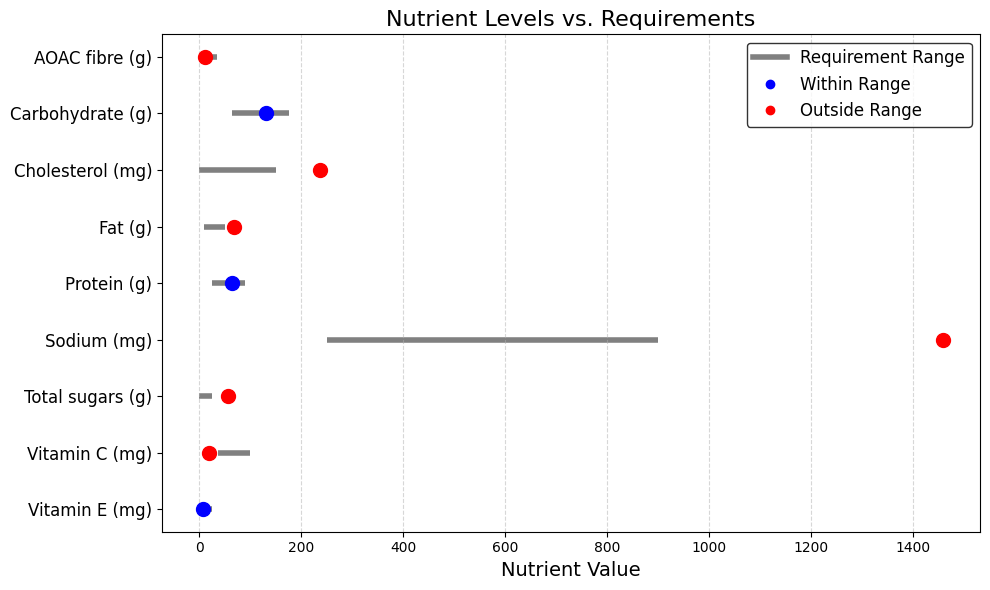

In [111]:
import numpy as np
import pandas as pd
from collections import Counter

num_runs = 100
calories_list = []
cal_per_weight_list = []
constraint_counter = Counter()
res_list = []

for run in range(num_runs):
    meal = create_random_meal_per_cluster(run)  
    res_df, calories, calories_density = check_meal(meal) 

    # Append results for later averaging
    res_list.append(res_df)

    # Track calories
    calories_list.append(calories)
    cal_per_weight_list.append(calories_density)

    # Count constraints violations
    for i, row in res_df.iterrows():
        if not row["R_holds"]:
            constraint_counter[i] += 1
        if not row["U_holds"]:
            constraint_counter[i] += 1

print("Avg Calories:", np.mean(calories_list))
print("Avg Calories/Weight:", np.nanmean(cal_per_weight_list))
print("Most often broken constraints:", constraint_counter)

# Combine all results and compute averages
combined_res = pd.concat(res_list)
avg_res = combined_res.groupby(level=0).mean()

# avg_res now contains the average Values, R, U, and the fraction of runs where R_holds/U_holds = True
# For example, an R_holds average of 0.9 means that in 90% of runs the requirement was held.

# Display the averaged results
fig_rand, ax_rand = plot_nutrient_levels(avg_res)

## My Meal

In [112]:
my_meal = pd.DataFrame(columns=create_random_meal().columns)

In [113]:
my_meal.loc[0, "Food Name"] = "Pasta, spaghetti, canned, in tomato sauce"
my_meal.loc[0, "Cluster"] = "Carbs"
my_meal.loc[0, "Quantity"] = 200
my_meal.loc[0, "Calories"] = df.loc[df["Food Name"] == "Pasta, spaghetti, canned, in tomato sauce"]["Energy (kcal) (kcal)"].values[0] / 100 * 150 

my_meal.loc[1, "Food Name"] = "Chicken breast/steak, coated, baked"
my_meal.loc[1, "Cluster"] = "Proteins"
my_meal.loc[1, "Quantity"] = 100
my_meal.loc[1, "Calories"] = df.loc[df["Food Name"] == "Chicken breast/steak, coated, baked"]["Energy (kcal) (kcal)"].values[0] / 100 * 100

my_meal.loc[2, "Food Name"] = "Tomatoes, stuffed with vegetables"
my_meal.loc[2, "Cluster"] = "Vegetables"
my_meal.loc[2, "Quantity"] = 70
my_meal.loc[2, "Calories"] = df.loc[df["Food Name"] ==  "Tomatoes, stuffed with vegetables"]["Energy (kcal) (kcal)"].values[0] / 100 * 50

my_meal.loc[3, "Food Name"] = "Cheesecake, fruit, individual"
my_meal.loc[3, "Cluster"] = "Sweet"
my_meal.loc[3, "Quantity"] = 100
my_meal.loc[3, "Calories"] = df.loc[df["Food Name"] ==  "Cheesecake, fruit, individual"]["Energy (kcal) (kcal)"].values[0] / 100 * 100

my_meal

,Food Name,Cluster,Quantity,Calories
0,"Pasta, spaghetti, canned, in tomato sauce",Carbs,200,108.0
1,"Chicken breast/steak, coated, baked",Proteins,100,234.0
2,"Tomatoes, stuffed with vegetables",Vegetables,70,47.5
3,"Cheesecake, fruit, individual",Sweet,100,264.0


In [114]:
df[(df["Cluster"] == "Carbs") & (df["Food Name"].str.contains("Pasta"))]
df[(df["Cluster"] == "Proteins") & (df["Food Name"].str.contains("Chicken"))]
df[(df["Cluster"] == "Vegetable") & (df["Food Name"].str.contains("Tomato"))]
df[(df["Cluster"] == "Sweet") & (df["Food Name"].str.contains("cake"))]

,Food Name,Energy (kcal) (kcal),Cluster,Protein (g),Fat (g),Carbohydrate (g),Total sugars (g),AOAC fibre (g),Vitamin E (mg),Vitamin C (mg),Cholesterol (mg),Sodium (mg)
279,"Cheesecake, fruit, frozen",294.0,Sweet,4.0,16.2,35.2,25.0,1.0,1.190,6.0,92.0,146.0
280,"Cheesecake, fruit, individual",264.0,Sweet,6.1,12.3,34.5,25.4,1.6,1.290,0.0,14.7,90.0
441,"Eccles cakes, retail",365.0,Sweet,4.4,18.3,48.8,34.0,3.6,0.900,0.0,22.9,221.0
517,Jaffa cakes,354.0,Sweet,4.4,8.5,69.3,51.6,1.5,0.300,2.0,9.4,85.0
639,"Oatcakes, homemade",411.0,Sweet,9.5,15.9,61.4,0.3,6.8,0.710,0.0,23.4,175.0
640,"Oatcakes, plain, retail",453.0,Sweet,9.3,20.0,62.8,3.2,9.4,2.520,0.0,4.9,796.0
667,"Pancakes, sweet, made with semi skimmed milk, ...",234.0,Sweet,6.3,7.4,37.9,17.0,1.0,3.130,0.0,48.0,51.0
668,"Pancakes, sweet, made with skimmed milk, homemade",234.0,Sweet,6.3,7.4,37.9,17.0,1.0,3.130,0.0,48.0,51.0
669,"Pancakes, sweet, made with whole milk, homemade",254.0,Sweet,6.3,9.7,37.8,16.9,1.0,3.170,1.0,53.6,49.0
878,"Rock cakes, homemade",386.0,Sweet,5.3,14.8,61.8,32.0,1.4,0.925,0.0,34.1,382.0


In [115]:
my_meal

,Food Name,Cluster,Quantity,Calories
0,"Pasta, spaghetti, canned, in tomato sauce",Carbs,200,108.0
1,"Chicken breast/steak, coated, baked",Proteins,100,234.0
2,"Tomatoes, stuffed with vegetables",Vegetables,70,47.5
3,"Cheesecake, fruit, individual",Sweet,100,264.0


In [116]:
res, cal, dens = check_meal(my_meal)

In [117]:
cal, dens

(np.float64(653.5), np.float64(1.3904255319148937))

In [118]:
res

,Values,R,U,R_holds,U_holds
Protein (g),29.190,25.0,90.0,True,True
Fat (g),28.700,10.0,50.0,True,True
Carbohydrate (g),88.930,65.0,175.0,True,True
Total sugars (g),42.680,0.0,25.0,True,False
AOAC fibre (g),6.020,12.5,35.0,False,True
Vitamin E (mg),5.838,7.5,25.0,False,True
Vitamin C (mg),15.900,37.5,100.0,False,True
Cholesterol (mg),62.900,0.0,150.0,True,True
Sodium (mg),939.500,250.0,900.0,True,False


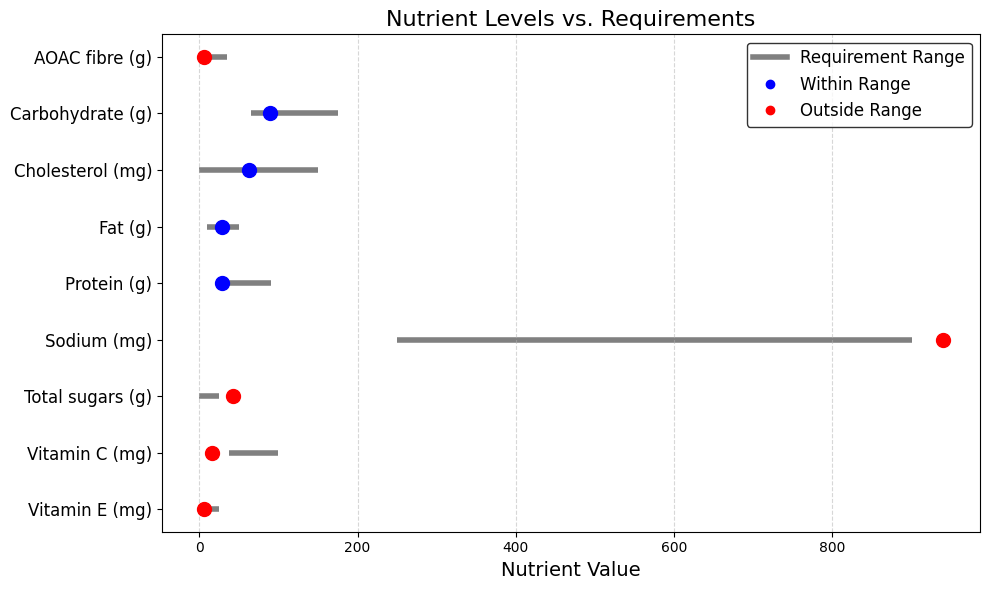

In [119]:
fig_my, ax_my = plot_nutrient_levels(res)
plt.show()

In [121]:
fig_opt.savefig("data/opt_plot.png", dpi=300, bbox_inches='tight')

In [122]:
fig_rand.savefig("data/rand_plot.png", dpi=300, bbox_inches='tight')

In [123]:
fig_my.savefig("data/my_plot.png", dpi=300, bbox_inches='tight')